In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [3]:
def pre_process():
    # Load the CSV file into a DataFrame
    file_path = '2019.csv'
    df = pd.read_csv(file_path)
    
    # Rename the columns
    columns_to_rename = {'Generosity': 'Generosity',
                         'GDP per capita': 'GDP',
                         'Social support': 'Family',
                         'Trust (Government Corruption)': 'Corruption',
                         'Freedom to make life choices': 'Freedom',
                         'Health (Life Expectancy)': 'Health',
                         'Country or region': 'Country',
                         'Happiness Score': 'Score'}
    
    df.rename(columns=columns_to_rename, inplace=True)
    
    # Save the DataFrame back to the CSV file, overwriting it
    df.to_csv(file_path, index=False)

In [4]:
def plot_countries_on_map(country_names, geojson_path='countries.geojson'):
    # Read the GeoJSON file into a GeoDataFrame
    world = gpd.read_file(geojson_path)

    # Filter GeoDataFrame to include only the specified countries
    selected_countries = world[world['ADMIN'].isin(country_names)]

    # Plot the selected countries
    fig, ax = plt.subplots(figsize=(10, 6))
    world.plot(ax=ax, color='lightgrey')  # Plot all countries in light grey
    selected_countries.plot(ax=ax, color='red', edgecolor='black')  # Plot selected countries in red

    plt.title('Clustered Countries on the Map')
    plt.show()

In [5]:
def train_linear_regression(df, features_to_train):
    # Features and target variable
    features = df[features_to_train]
    target = df['Score']

    # Feature Scaling with StandardScaler
    scaler = StandardScaler()
    features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

    # Create a linear regression model
    model = LinearRegression()

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')

    # Plot the regression line
    min_val = min(min(y_test), min(predictions))
    max_val = max(max(y_test), max(predictions))
    plt.plot([min_val, max_val], [min_val, max_val], '--', color='red', label="Regression Line")

    # Visualize predicted vs actual values
    plt.scatter(y_test, predictions)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted Values")
    plt.show()
    
    return (model, mse, r2)

In [6]:
def plot_linear_regression_model(model, mse, r2):
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')

    # Plot the regression line
    min_val = min(min(y_test), min(predictions))
    max_val = max(max(y_test), max(predictions))
    plt.plot([min_val, max_val], [min_val, max_val], '--', color='red', label="Regression Line")

    # Visualize predicted vs actual values
    plt.scatter(y_test, predictions)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted Values")
    plt.show()


In [7]:
def correlation_coefficients(df, selected_features=None, countries=None):
    if countries:
        df = df[df['Country'].isin(countries)]
    # Use only selected features if provided
    if selected_features:
        df = df[['Score'] + selected_features]

    # Calculate correlation coefficients
    correlation_coefficients = df.corr()['Score']

    # Plot the bar chart
    plt.bar(correlation_coefficients.index[1:], correlation_coefficients[1:])
    plt.title('Correlation Between Selected Features and Happiness Score')
    plt.xlabel('Selected Features')
    plt.ylabel('Pearson Correlation Coefficient')
    plt.xticks(rotation=90)
    plt.legend(['Correlation Coefficient'])
    plt.tight_layout()
    plt.show()

In [8]:
def visualize_kmeans_results(data, selected_features, n_clusters=3):
    # Extract features from the DataFrame
    features = data[selected_features].values

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(features)

    # Apply k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data['Cluster'] = kmeans.fit_predict(reduced_features)

    # Visualize the results on a scatter plot
    plt.figure(figsize=(10, 6))
    for cluster_label in range(n_clusters):
        cluster_data = data[data['Cluster'] == cluster_label]
        plt.scatter(cluster_data[selected_features[0]], cluster_data[selected_features[1]], label=f'Cluster {cluster_label}')

    # Plot cluster centers

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'K-Means Clustering Results')
    plt.legend()
    plt.show()

    # Create a dictionary to store cluster information
    cluster_dict = {}

    # Populate the dictionary with country names for each cluster
    for cluster_label in range(n_clusters):
        cluster_data = data[data['Cluster'] == cluster_label]
        country_names = cluster_data['Country'].tolist()
        cluster_dict[cluster_label] = country_names

    return cluster_dict

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


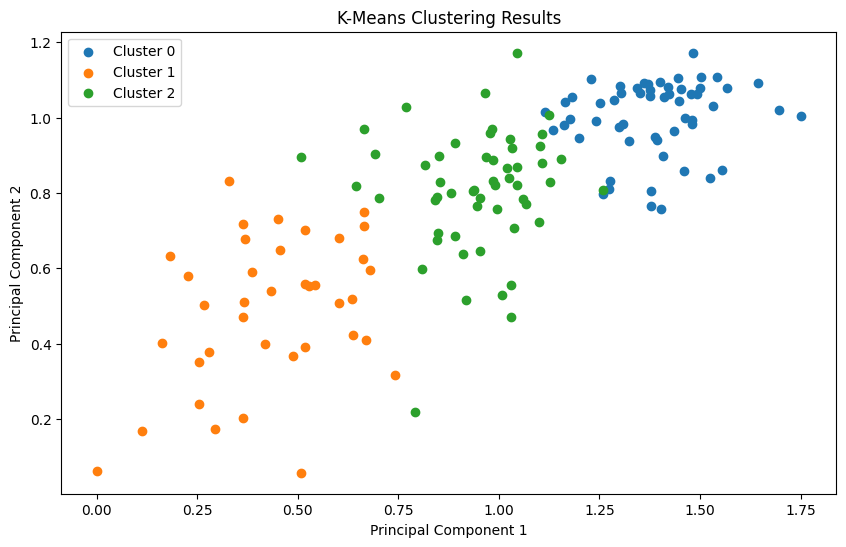

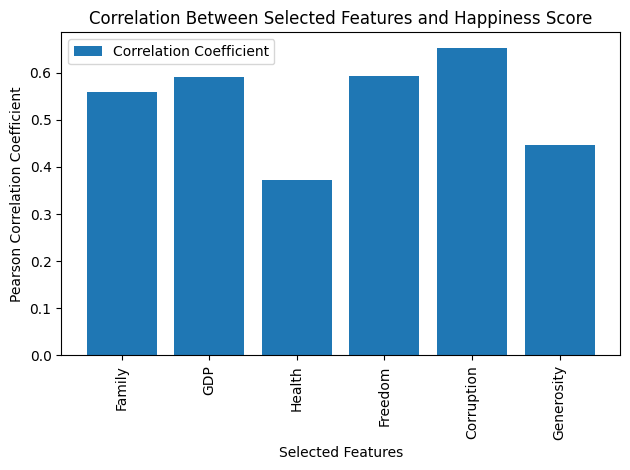

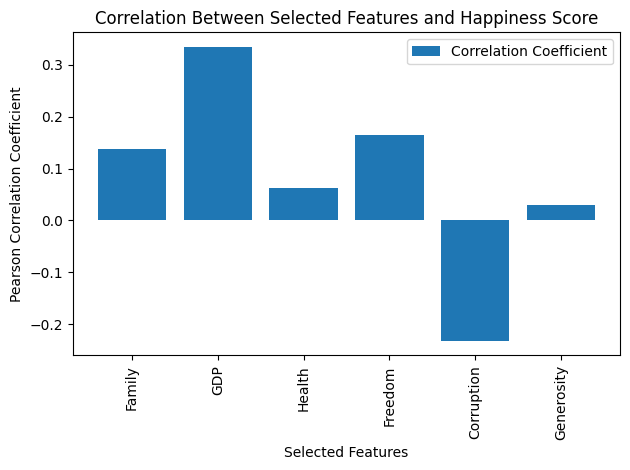

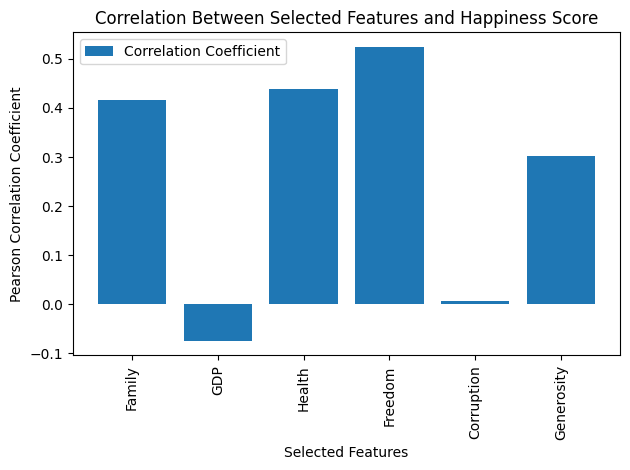

In [10]:
all_features = ['GDP', 'Family', 'Health', 'Generosity', 'Corruption', 'Freedom']
features = ['Family', 'GDP', 'Health','Freedom', 'Corruption', 'Generosity']

# Read the CSV file into a DataFrame
df = pd.read_csv('2021.csv')

df = df.drop(df.index[-1])

df = df[['Family', 'GDP', 'Health','Freedom', 'Corruption', 'Generosity', 'Score', 'Country']]

# Handle missing values with SimpleImputer for both features and target
imputer = SimpleImputer(strategy='mean')
df[features] = imputer.fit_transform(df[features])
df['Score'] = imputer.fit_transform(df[['Score']])

models = [
            (all_features, 'All features'),
            (all_features[0:3], 'Highly correlated features (>0.7)'),
            (['GDP', 'Corruption', 'Freedom'], 'Political/economical features'),
            (['Health', 'Generosity'], 'Personally controllable features'),

            # (['Family', 'Corruption'], 'Top scoring features'),
            # (['Family', 'Health'], 'Middle scoring features'),
            # (['Family', 'Freedom'], 'Bottom scoring features'),
        ]

# correlation_coefficients(df, features)
clusters = visualize_kmeans_results(df, all_features, n_clusters=3)

for i in clusters:
    # print(clusters[i])
    # plot_countries_on_map(clusters[i])
    correlation_coefficients(df, features, clusters[i])

# mse_values = []
# for i in models:
#     model, mse, r2 = train_linear_regression(df, i[0])

#     # Map coefficients to labels
#     print(model.coef_)
#     print(model.intercept_)
#     print(r2)
#     print(mse)
#     mse_values.append(mse)

# plt.figure(figsize=(10, 6))
# plt.bar(range(1, len(models) + 1), mse_values, tick_label=[f'{mod[1]} model' for mod in models])
# plt.xticks(rotation=45, ha='right')
# plt.title('Performance Comparison of Multiple Regression Models')
# plt.xlabel('Model')
# plt.ylabel('Mean Squared Error (MSE)')
# plt.show()